In [1]:
import numpy as np
import matplotlib.pyplot as plt

We're going to go step by step and implement minibatch stochastic gradient descent from scratch to fit a linear function to some data.  
First, let's create some data that follows a linear trend:

In [2]:
seed = np.random.seed(seed = 12)
xs = np.arange(60)
noise = np.random.uniform(-35,35, size=(60,))

slope = 2.7 # target variable 1
intercept = .8 # target variable 2
ys = (slope * xs) + intercept + noise

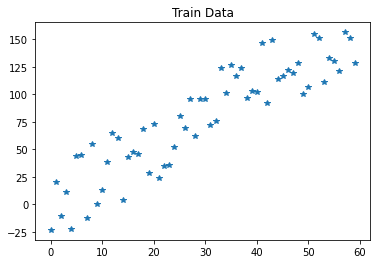

In [3]:
plt.figure()
plt.plot(xs, ys, '*')
plt.title('Train Data')
plt.show()

Now we'll create the function we want to approximate

In [4]:
def linear_model(x:np.ndarray, w:float, b:float) -> np.ndarray:
    """
    Takes input data and scales/shifts by weight and bias parameters.
    """
    return w * x + b

def loss(preds:np.ndarray, true:np.ndarray) -> float:
    """
    Calculates the MSE loss function
    """
    return np.mean((preds - true)**2)

In [5]:
b_rand = 0.1 # random initial guess
w_rand = 0.1 # random initial guess
model = linear_model(x = xs, w = w_rand, b = b_rand )

What we're going to do now is use (mini) batch gradient descent instead of the standard gradient descent we had implemented previously. The way this works is:  

1. Sample a mini batch of N samples from the dataset, where N is some small amount less than the total size.
2. Feed it to the algorithm of choice.
3. Calculate the mean gradient of the mini-batch.
4. Use the gradient we calculated above to update the weights.
5. Repeat steps 2–4 for the amount of epochs desired.

In [6]:
# define the functions we'll use in calculating gradient descent

def dldw(x:np.ndarray, diff:np.ndarray) -> float:
    """
    Calculates the derivative of loss with respect to parameter w in linear regression
    """
    return -2 * x.dot(diff) / len(x)

def dldb(diff:np.ndarray) -> float:
    """
    Calculates the derivative of loss with respect to b
    """
    return -2 * diff.sum() / len(diff)


def train_loop(epochs:int,
               batch_size:int,
               w: float,
               b:float,
               x:np.ndarray,
               reals:np.ndarray,
               lr:float = 0.001)-> tuple:
    """
    Controls the training loop for linear regression
    Args:
        epochs - number of updates to make to the weights
        batch_size - number of data points to use per epoch
        w - initial guess for weights
        b - intial guess for bias
        x - input x axis data
        reals - true y valued outputs
        lr - learning rate
    Out - tuple of loss, epoch, w_per_epoch, b_per_epoch
    """
    loss_per_epoch = []
    b_per_epoch = []
    w_per_epoch = []
    epochs_list = [i for i in range(epochs)]

    for e in range(epochs):
        # mini batch
        idxs = np.random.choice(len(x), size=batch_size)
        mini_x = x[idxs]
        mini_y = reals[idxs]
        
        preds=linear_model(x=mini_x, w=w, b=b)
        epoch_loss=loss(preds=preds, true=mini_y)
        loss_per_epoch.append(epoch_loss)

        # update the parameters
        diff = mini_y - preds 
        w -= (lr * dldw(x=mini_x, diff=diff))
        w_per_epoch.append(w)
        b -= (lr * dldb(diff=diff))
        b_per_epoch.append(b)

    return loss_per_epoch, epochs_list, w_per_epoch, b_per_epoch


In [7]:
loss_per_epoch, epochs_list, w_est, b_est = train_loop(
    epochs = 20,
    batch_size=16,
    w=-2,
    b=12,
    x=xs,
    reals=ys,
    lr=0.0001)

Let's make a plot to show how our model updates its parameters over time to (hopefully) become more accurate. Dimmer lines are earlier guesses, and darker lines are the last few weight updates. 

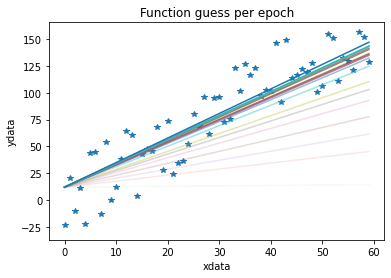

In [8]:
alphas = np.linspace(0, 1, len(epochs_list)) # transparency

plt.figure()
plt.title('Function guess per epoch')
plt.plot(xs, ys, '*', label='reals')
plt.xlabel('xdata')
plt.ylabel('ydata')
for i in range(len(epochs_list)):
    plt.plot(xs, linear_model(x=xs, w=w_est[i], b=b_est[i]), alpha = alphas[i] )
plt.show()

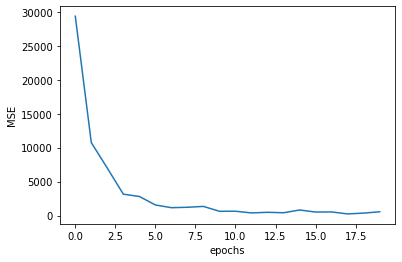

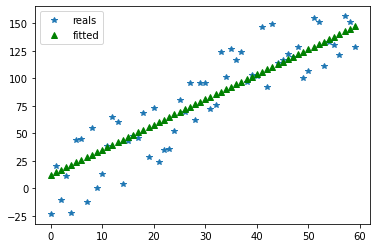

In [9]:
def compare_results(estim_w:float, estim_b:float, epochs:int, loss:list):
    """
    Plots loss per epoch and compares final function to real func
    """
    plt.figure()
    plt.plot(epochs, loss)
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.figure()
    plt.plot(xs, ys, '*', label='reals')
    plt.plot(xs, linear_model(x=xs, w=estim_w, b=estim_b), 'g^', label='fitted')
    plt.legend()
    plt.show()

compare_results(estim_w=w_est[-1], estim_b=b_est[-1], epochs=epochs_list, loss=loss_per_epoch)

There are a few things that can be improved upon here:  
- Our quick and easy mini batch approach was just random sampling with replacement, a more robust approach would be to pre-define your batches before entering the train loop, to avoid constantly sampling from a large dataset.
- Additionally you could ensure your mini-batches are non overlapping by sampling without replacement.
- We could test for optimal mini batch size on this dataset, but 16 or 32 is usually a good starting point.